# Data Analysis and Exploration of the Dengue dataset
Simple analysis and hypothesis for choosing some features over the others

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [2]:
features = pd.read_csv('data/dengue_features_train.csv', index_col=[1,2])
labels = pd.read_csv('data/dengue_labels_train.csv', index_col=[1,2])

features = features.drop(['week_start_date'], axis = 1)

data = pd.concat([features,labels['total_cases']], axis = 1)

sj_ft = data[data.city == 'sj'].drop(['city'],axis=1)
iq_ft = data[data.city == 'iq'].drop(['city'],axis=1)

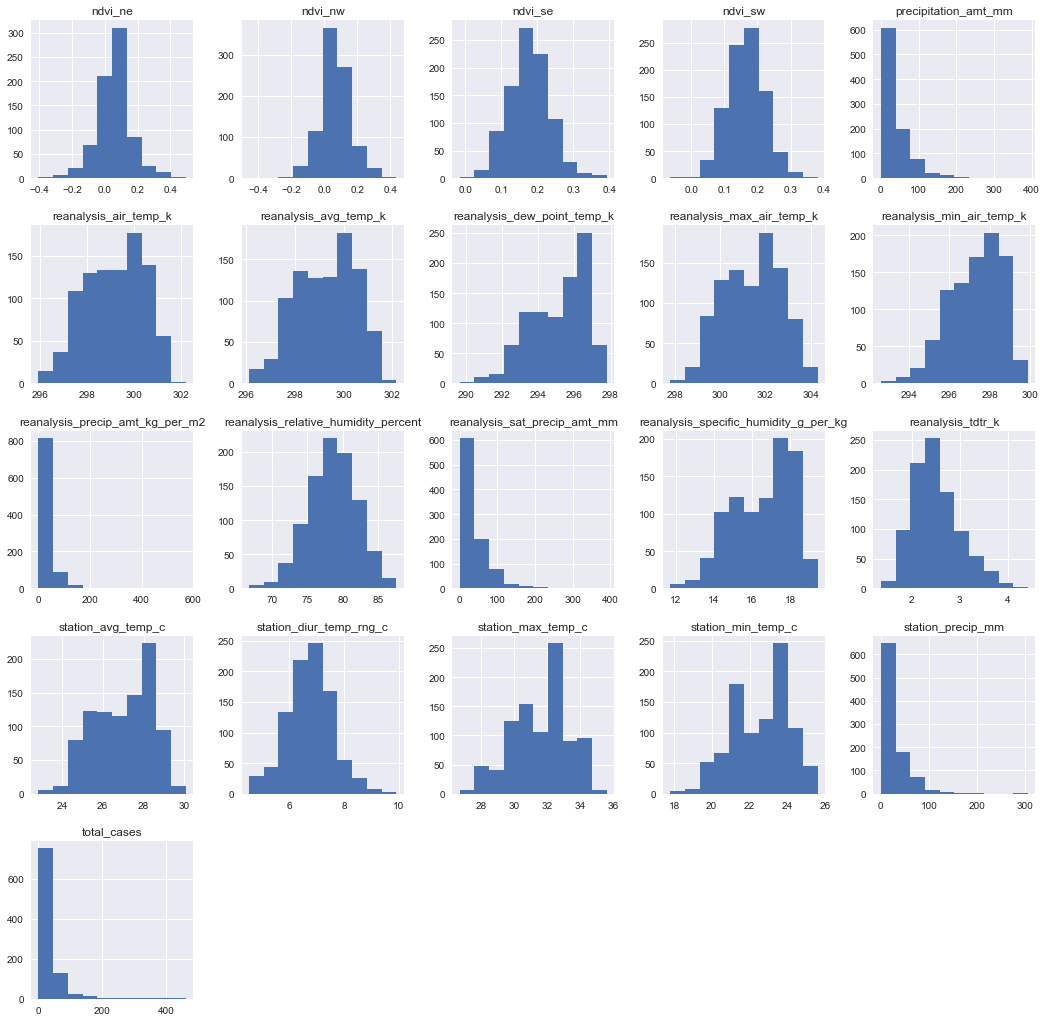

In [3]:
pd.DataFrame.hist(sj_ft, figsize=[18,18]);

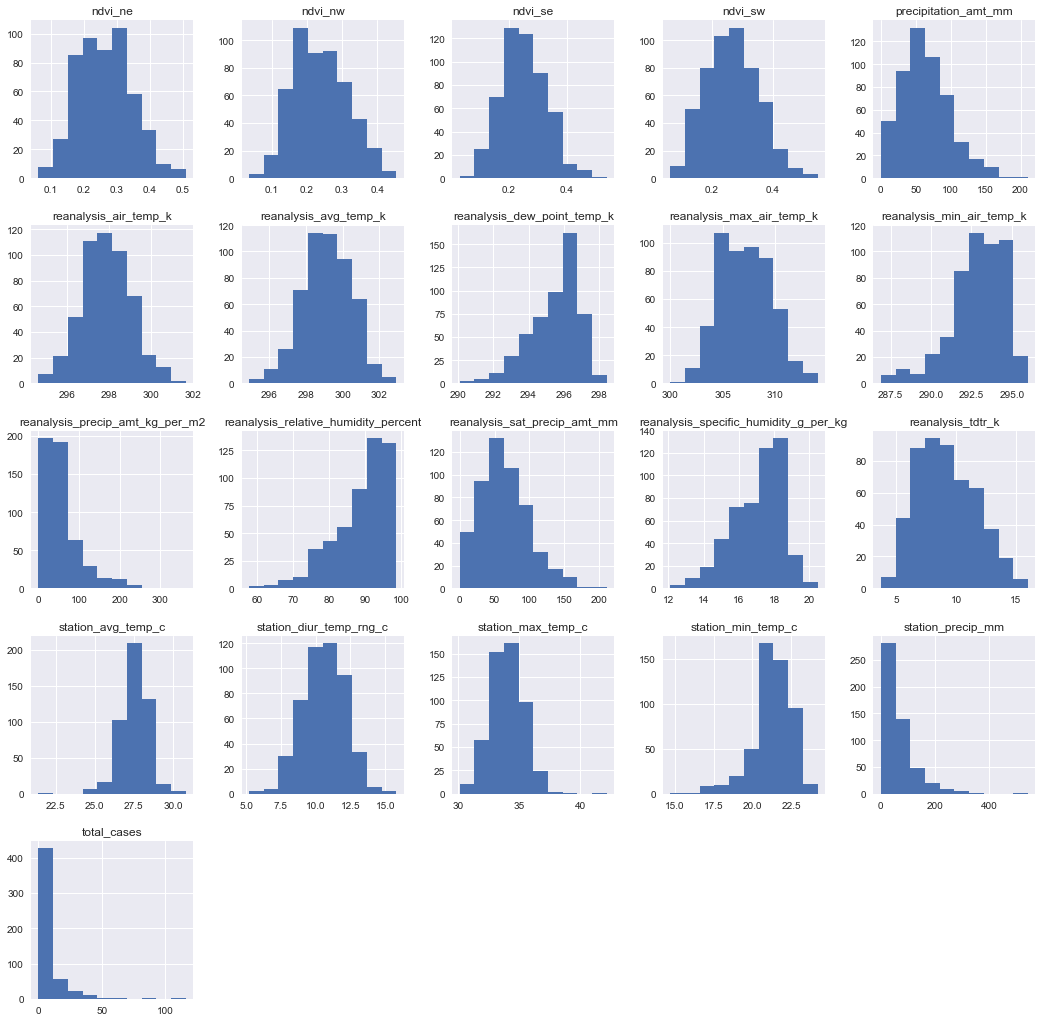

In [4]:
pd.DataFrame.hist(iq_ft, figsize=[18,18]);

In [5]:
#Calculate the correlation between variables
corr_sj = sj_ft.corr()
corr_iq = iq_ft.corr()

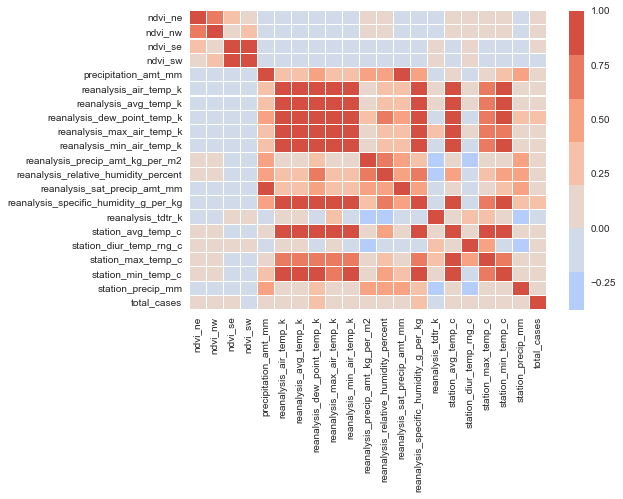

In [6]:
sns.heatmap(corr_sj, cmap=sns.color_palette("coolwarm", 10), center=0, linewidths=0.1)

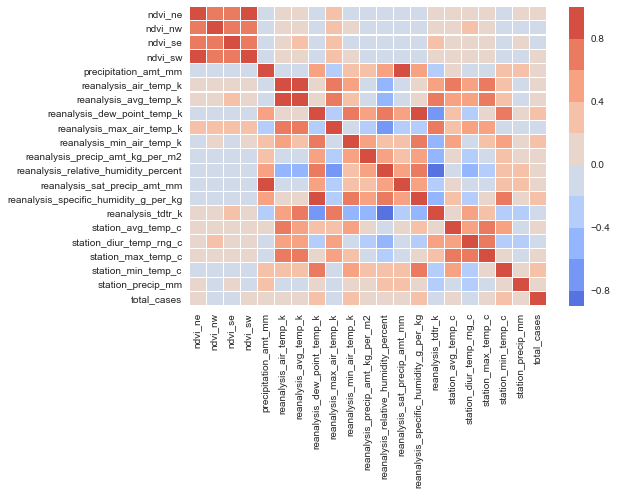

In [7]:
sns.heatmap(corr_iq, cmap=sns.color_palette("coolwarm", 10), center=0, linewidths=0.1)

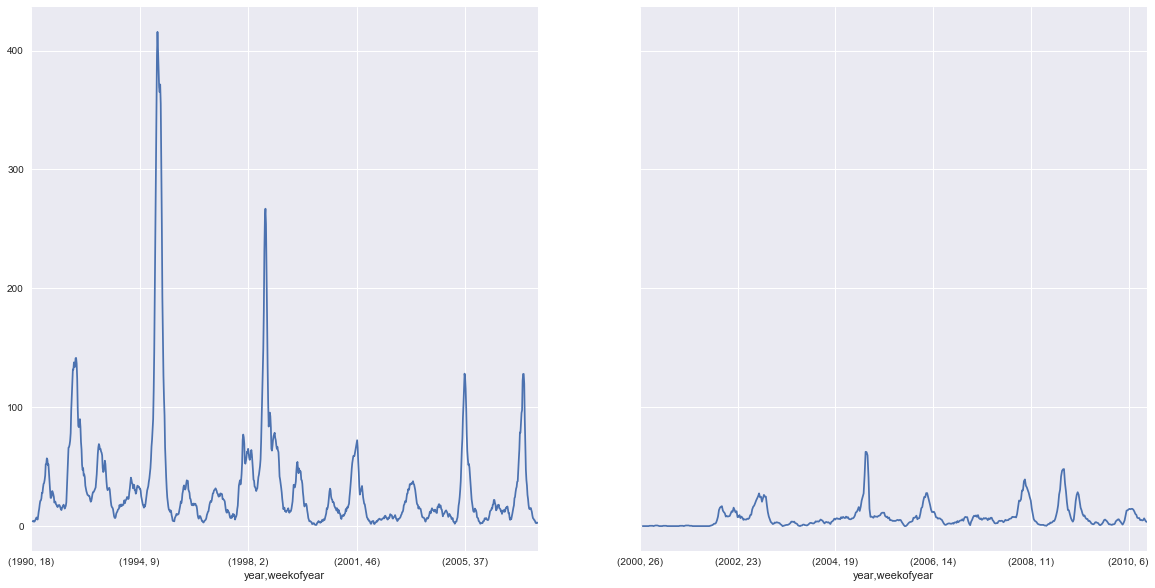

In [8]:
fig, ax = plt.subplots(1,2,sharey='row', figsize=(20, 10))

sj_ft['total_cases'].rolling(4).mean().plot(ax=ax[0])
iq_ft['total_cases'].rolling(4).mean().plot(ax=ax[1])

## Features selection

Since there are plenty of features, I'll use a subset of them to try and find the best predictors of the quantity of dengue in both cities. So, the hypothesis are:


* Deforestation has a big part on the increase of dengue cases so I'll include a single festure that is the linear combination of the four features that represent the presence of vegetation. 
* Precipitation is a major feature that predicts the number of cases of dengue. So, I'll include two features regarding it.
* Humidity is highly correlated to precipitation. I'll include 1 feature of that.
* Temperature is also a factor in the proliferation of mosquitos. Higher temperatures will lead to an increase in the reproduction and birth of mosquitos. I'll include 2 features regarding that.

### NDVI

The normalized difference vegetation index (NDVI) is a simple graphical indicator that can be used to analyze remote sensing measurements, typically but not necessarily from a space platform, and assess whether the target being observed contains live green vegetation or not. [reference](https://en.wikipedia.org/wiki/Normalized_Difference_Vegetation_Index)

* Negative values of NDVI (values approaching -1) correspond to water.
* Very low values of NDVI (0.1 and below) correspond to barren areas of rock, sand, or snow. 
* Moderate values represent shrub and grassland (0.2 to 0.3).
* High values indicate temperate and tropical rainforests (0.6 to 0.8). [reference](https://earthobservatory.nasa.gov/Features/MeasuringVegetation/)


mean: 0.1216


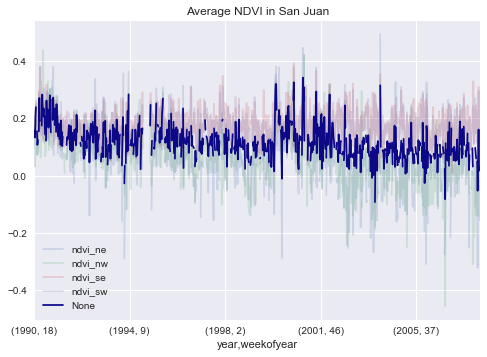

In [9]:
sj_ft[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].plot(alpha=0.2)
sj_ft.eval('(ndvi_ne+ndvi_nw+ndvi_se+ndvi_sw)/4').plot(legend='mean', colormap = 'plasma', title='Average NDVI in San Juan')
avg_value = sj_ft.eval('(ndvi_ne+ndvi_nw+ndvi_se+ndvi_sw)/4').rolling(3).mean().fillna(method='ffill').fillna(method='bfill').values.mean()
print('mean: {:5.4f}'.format(avg_value))

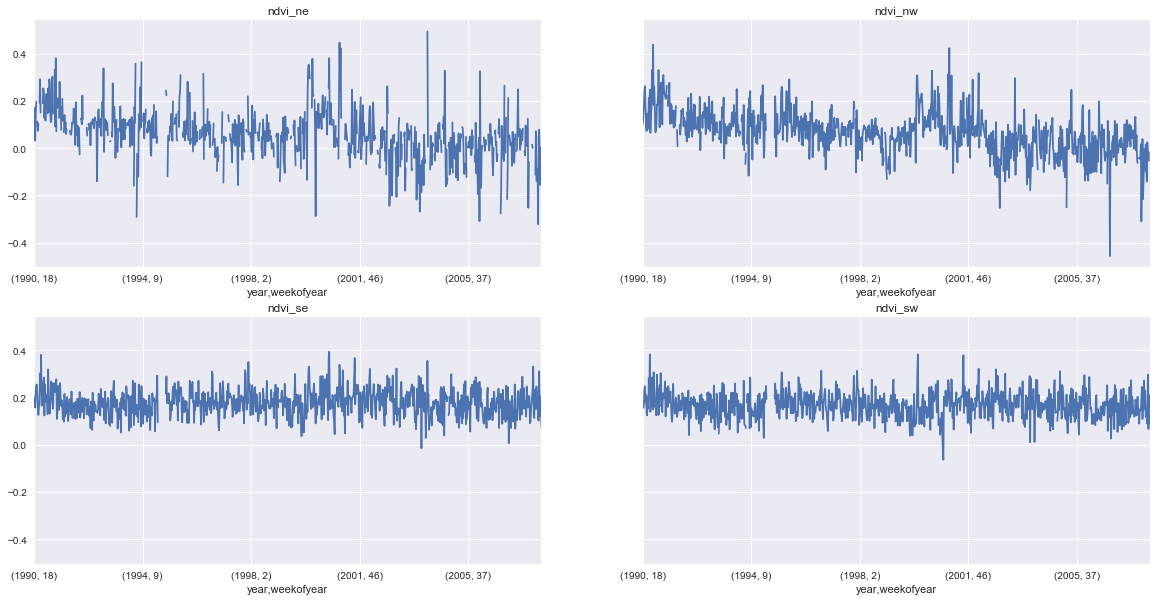

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = [20,10], sharey='all')
columns = ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']
ax_location = [(0,0),(0,1),(1,0),(1,1)]

for i, feature in enumerate(columns):
    sj_ft[feature].plot(ax=ax[ax_location[i]], title=feature)

According to the NASA link for the measures of NDVI, the city of San Juan has a vegetation more inclined towards sand, and water in the **Northeast** and **Northwest** and shrub and grasslands in the **Southeast** and **Southwest**. Shrub and grasslands are regions more notorious for the presence of Mosquitos.

mean: 0.2551


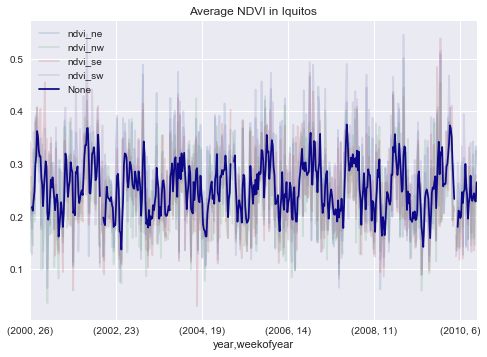

In [11]:
iq_ft[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].plot(alpha=0.2)
iq_ft.eval('(ndvi_ne+ndvi_nw+ndvi_se+ndvi_sw)/4').rolling(3).mean().plot(legend='mean', colormap = 'plasma', title='Average NDVI in Iquitos')
avg_value = iq_ft.eval('(ndvi_ne+ndvi_nw+ndvi_se+ndvi_sw)/4').rolling(3).mean().fillna(method='ffill').fillna(method='bfill').values.mean()
print('mean: {:5.4f}'.format(avg_value))

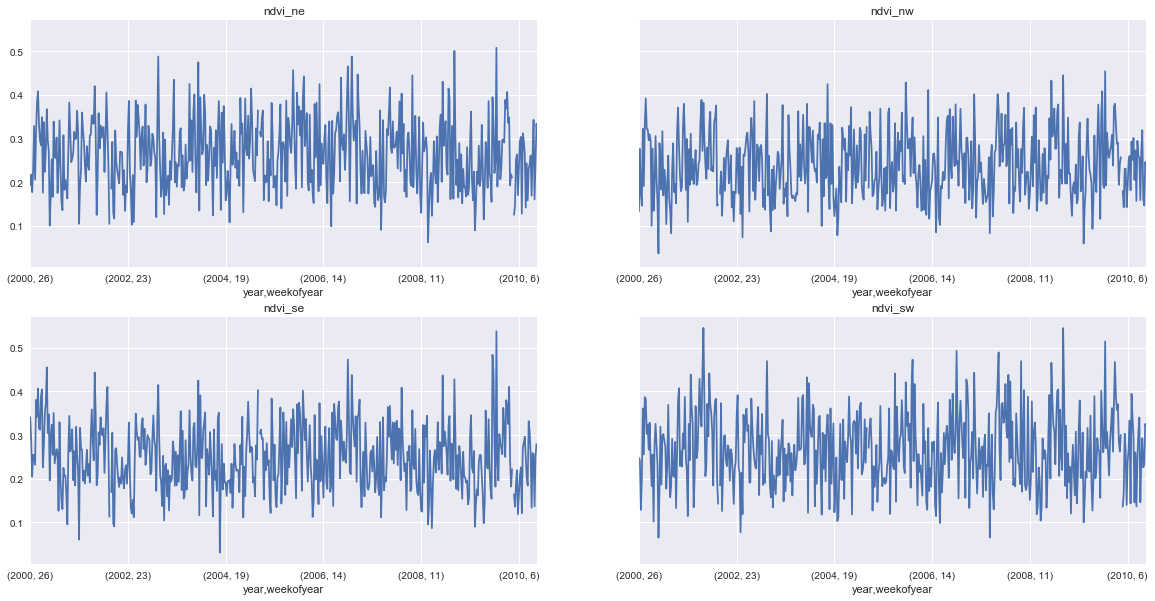

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = [20,10], sharey='all')
columns = ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']
ax_location = [(0,0),(0,1),(1,0),(1,1)]

for i, feature in enumerate(columns):
    iq_ft[feature].plot(ax=ax[ax_location[i]], title=feature)

The city of iquitos is learning more towards grasslands and forests through the years.

## Fill missing values

In [13]:
sj_ft.isnull().sum()

ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_max_temp_c                         6
station_min_temp_c                         6
station_precip_mm                          6
total_cases                                0
dtype: int64

In [14]:
iq_ft.isnull().sum()

ndvi_ne                                   3
ndvi_nw                                   3
ndvi_se                                   3
ndvi_sw                                   3
precipitation_amt_mm                      4
reanalysis_air_temp_k                     4
reanalysis_avg_temp_k                     4
reanalysis_dew_point_temp_k               4
reanalysis_max_air_temp_k                 4
reanalysis_min_air_temp_k                 4
reanalysis_precip_amt_kg_per_m2           4
reanalysis_relative_humidity_percent      4
reanalysis_sat_precip_amt_mm              4
reanalysis_specific_humidity_g_per_kg     4
reanalysis_tdtr_k                         4
station_avg_temp_c                       37
station_diur_temp_rng_c                  37
station_max_temp_c                       14
station_min_temp_c                        8
station_precip_mm                        16
total_cases                               0
dtype: int64

In [15]:
sj_ft = sj_ft.fillna(method='ffill').fillna(method='bfill')
iq_ft = iq_ft.fillna(method='ffill').fillna(method='bfill')

## Create vegetation feature column

In [16]:
## Average of the 4 features every week
veg_iq = pd.DataFrame()
veg_sj = pd.DataFrame()
veg_iq['avg_vegetation'] = iq_ft.eval('(ndvi_ne+ndvi_nw+ndvi_se+ndvi_sw)/4')
veg_sj['avg_vegetation'] = sj_ft.eval('(ndvi_ne+ndvi_nw+ndvi_se+ndvi_sw)/4')

## Precipitation

Precipitation has been found to be correlated to dengue proliferation. I'll test 2 features regarding it. I'll include the weekly metric of rain as one, and the rain in the previous week as a factor.

In [17]:
rain_columns = ['precipitation_amt_mm','reanalysis_precip_amt_kg_per_m2','reanalysis_sat_precip_amt_mm','station_precip_mm']

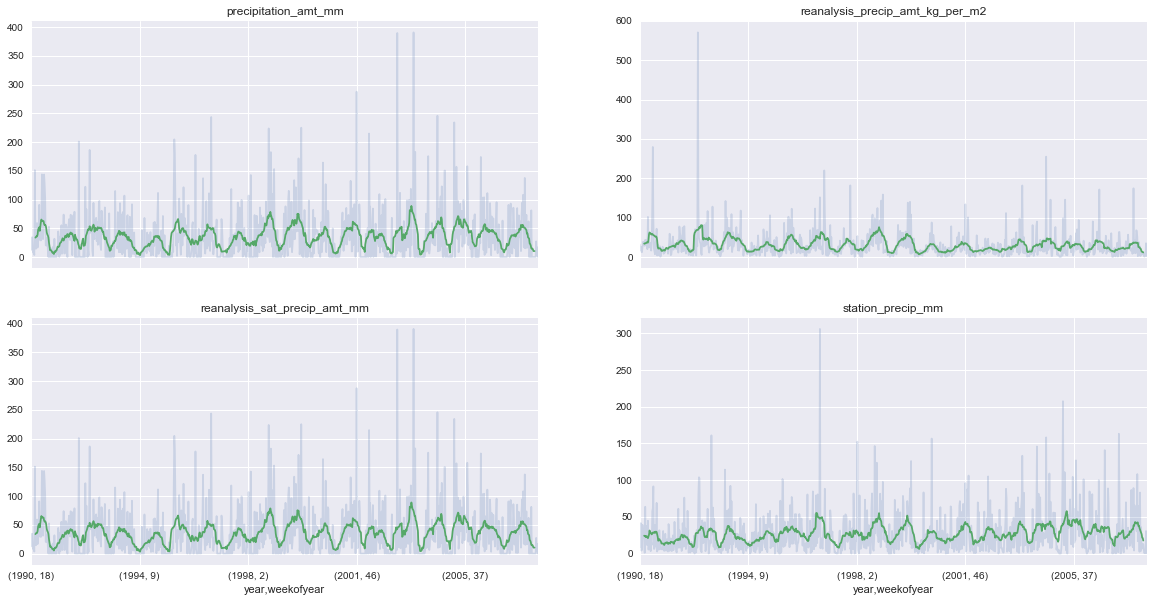

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = [20,10], sharex='all')
ax_location = [(0,0),(0,1),(1,0),(1,1)]

for i, feature in enumerate(rain_columns):
    sj_ft[feature].plot(ax=ax[ax_location[i]], title=feature, alpha = 0.2)    
    sj_ft[feature].rolling(16, center = True).mean().plot(ax=ax[ax_location[i]], title=feature)

We can see that the data measured from station is different from the other two that use the same metric. I'll use the satelite data in mm.

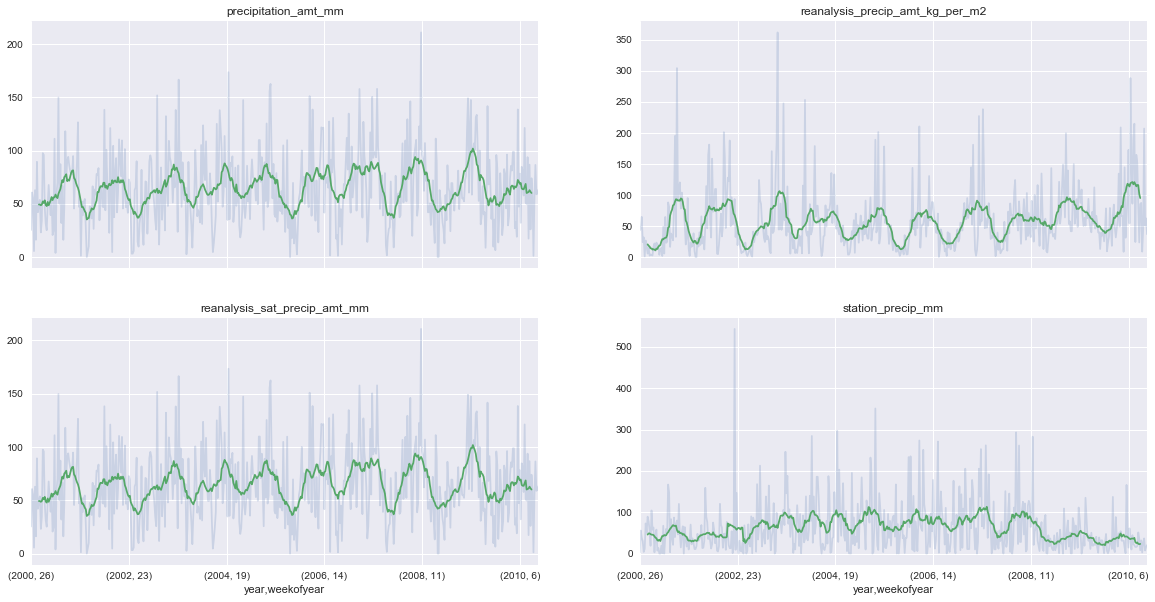

In [19]:
## rolling mean of 4 months to see if we find any trends in the rain data
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = [20,10], sharex='all')
ax_location = [(0,0),(0,1),(1,0),(1,1)]

for i, feature in enumerate(rain_columns):
    iq_ft[feature].plot(ax=ax[ax_location[i]], title=feature, alpha = 0.2)    
    iq_ft[feature].rolling(16, center = True).mean().plot(ax=ax[ax_location[i]], title=feature)

Same here.

In [20]:
prec_sj = pd.DataFrame()
prec_iq = pd.DataFrame()
prec_sj['precipitation_mm'] = sj_ft['precipitation_amt_mm']
prec_iq['precipitation_mm'] = iq_ft['precipitation_amt_mm']

In [21]:
prec_iq['diff_prec_week'] = prec_iq.diff()
prec_sj['diff_prec_week'] = prec_sj.diff()

## Humidity